# Heart Failure

In [1]:
import pandas as pd

## Retrieve the Data

**The Data was retrieved from Kaggle : [https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction]**

In [2]:
# Import the data into a dataframe
path = "resources/heart.csv"
data = pd.read_csv(path)

data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
# Check all the Fields
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [4]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


1. Age Range 28 - 77 years old

In [5]:
data['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

In [6]:
data['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

This data shows that 508  people has the heart disease out of 4

In [7]:
# Confirm all the values exists
data.isnull().mean()

Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64

In [8]:
numerical_fields = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS','MaxHR', 'Oldpeak']

categorical_fields = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [9]:
data[numerical_fields].describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000


In [10]:
# Preview the category columns in the raw format
# ---------------------------------------------

# Before one-hot-encoded
before_one_hot_encoded =data.copy()

before_one_hot_encoded = before_one_hot_encoded.drop(columns=numerical_fields)
del(before_one_hot_encoded['HeartDisease'])

before_one_hot_encoded

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
913,M,TA,Normal,N,Flat
914,M,ASY,Normal,N,Flat
915,M,ASY,Normal,Y,Flat
916,F,ATA,LVH,N,Flat


In [11]:
# OneHotEncoder on columns with categorical data
from sklearn.preprocessing import OneHotEncoder

# Create an instance of OneHotEncoder()
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Columns to one hot encode
columns_to_enocde = categorical_fields

# Fit the encoder to the data
# Identifies the unique categories of each column and assigns a binary vector 
enc.fit(data[columns_to_enocde])

# Transform the data
# Each unique category becomes a separate binary column
data_one_hot_encoded = enc.transform(data[columns_to_enocde])


# Create a pandas dataframe to join this with the original dataframe
data_one_hot_encoded_df = pd.DataFrame(
    data_one_hot_encoded,
    columns = enc.get_feature_names_out(columns_to_enocde),
    index= data.index
)


In [12]:
print(type(data))
print(type(data_one_hot_encoded_df))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [13]:
# Preview the one-hot-encoded dataframe
data_one_hot_encoded_df

,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
914,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
915,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
916,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [14]:
# join the original df with the one-hot encoded binary columns
data = pd.concat([data, data_one_hot_encoded_df], axis=1)

# delete the original categorical fields
data = data.drop(columns=categorical_fields)
data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,160,180,0,156,1.0,1,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,130,283,0,98,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,48,138,214,0,108,1.5,1,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54,150,195,0,122,0.0,0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
914,68,144,193,1,141,3.4,1,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
915,57,130,131,0,115,1.2,1,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
916,57,130,236,0,174,0.0,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Splitting the data

In [15]:
# Import module
from sklearn.model_selection import train_test_split

# Split training and testing sets
# Create the features Dataframe X
X = data.copy()
X = data.drop(columns = ['HeartDisease'])

# Create the target Dataframe, y
y = data['HeartDisease']

# Use train_test_split to separate the data
X_train, X_test, y_train, y_test = train_test_split(X, y)



### Apply Standard Scaler

In [16]:
# StandardScaler on columns with numerical data
from sklearn.preprocessing import StandardScaler

# Scale the x data by using Standard Scaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[ 1.44851399, -1.72764608,  0.93908798, ..., -0.27691572,
         1.04459821, -0.90559694],
       [-1.09053729, -0.56181233, -1.81836536, ..., -0.27691572,
        -0.95730588,  1.10424401],
       [ 0.49636976, -0.03188789,  0.24741908, ..., -0.27691572,
        -0.95730588,  1.10424401],
       ...,
       [ 0.28478216,  1.1869383 , -1.81836536, ..., -0.27691572,
         1.04459821, -0.90559694],
       [-0.13839306, -0.7737821 , -0.10302649, ..., -0.27691572,
         1.04459821, -0.90559694],
       [ 0.39057596, -1.46268386, -1.81836536, ..., -0.27691572,
         1.04459821, -0.90559694]])

In [17]:
# Scale the x  test data using Standard scaler
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-1.30212489, -1.46268386,  0.00764053, ..., -0.27691572,
        -0.95730588,  1.10424401],
       [-0.03259925,  0.39205165,  0.17364106, ..., -0.27691572,
         1.04459821, -0.90559694],
       [ 1.02533878,  2.7767116 , -1.81836536, ..., -0.27691572,
        -0.95730588,  1.10424401],
       ...,
       [-2.25426912, -1.19772165,  0.25664133, ..., -0.27691572,
        -0.95730588,  1.10424401],
       [ 0.91954498, -0.66779721,  0.52408664, ..., -0.27691572,
         1.04459821, -0.90559694],
       [ 1.6601016 ,  0.49803654,  0.68086492, ..., -0.27691572,
        -0.95730588,  1.10424401]])

In [18]:
 # Check the max and min of the scaled training and testing sets
print("Scaled data min/max (StandardScaler):")
print("Training data min:",X_train_scaled.min())
print("Training data max:",X_train_scaled.max())
print("Testing data min:",X_test_scaled.min())
print("Testing data max:",X_test_scaled.max())


Scaled data min/max (StandardScaler):
Training data min: -7.02689041519964
Training data max: 5.136211665136863
Testing data min: -3.3245490426513022
Testing data max: 4.559341616878578


### Model and Fit the Data to a Logistic Regression

In [28]:
# Import 'LogisticRegression' from sklean
from sklearn.linear_model import LogisticRegression

# Create an instance of LogisticRegression
logistic_regression_model = LogisticRegression()

# Fit the model
logistic_regression_model.fit(X_train_scaled, y_train)



Training Data Score: 0.87645


In [31]:
# Predict the test data
lr_predictions = logistic_regression_model.predict(X_test_scaled)

lr_predictions

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0], dtype=int64)

In [34]:
# Save both the test predictions and actual test values to a DataFrame
results_df = pd.DataFrame({
    "Testing Data Predictions": lr_predictions, 
    "Testing Data Actual Targets": y_test})

results_df

,Testing Data Predictions,Testing Data Actual Targets
670,0,0
87,0,0
372,1,1
248,1,1
249,1,1
...,...,...
358,1,1
663,1,1
67,0,0
614,1,1


In [49]:
# Import the accuracy_score function
from sklearn.metrics import accuracy_score

lr_train_score = logistic_regression_model.score(X_train_scaled, y_train)
lr_test_score = accuracy_score(y_test, lr_predictions)
score_gap = lr_train_score - lr_test_score

# Calculate the model's accuracy on the test dataset
print(f"Training Data Score: {lr_train_score}")
print(f"Testing Data Score: {lr_test_score}")
print(f"Score gap: {score_gap}")

Training Data Score: 0.876453488372093
Testing Data Score: 0.8434782608695652
Score gap: 0.03297522750252779


### Model and Fit to a Support Vector Machine

In [54]:
from sklearn.svm import SVC 

# Create the support vector machine classifier model with a 'rbf' kernel
svm_model = SVC(kernel='rbf')

# Fit the model to the training data
svm_model.fit(X_train_scaled, y_train)

# Explicit : Predict the test data
svm_train_predictions = svm_model.predict(X_train_scaled)
svm_test_predictions = svm_model.predict(X_test_scaled)

In [58]:
 # Validate the model by checking the model accuracy with model.score
svm_training_score = accuracy_score(y_train, svm_train_predictions)
svm_testing_score = accuracy_score(y_test, svm_test_predictions)
svm_score_gap = svm_training_score - svm_testing_score

print(f"SVM Model | Training Data Score: {svm_training_score}")
print(f"SVM Model | Testing Data Score: {svm_testing_score}")
print(f"SVM Model | Score gap: {svm_score_gap}")

SVM Model | Training Data Score: 0.9244186046511628
SVM Model | Testing Data Score: 0.8565217391304348
SVM Model | Score gap: 0.06789686552072793


### Model and Fit to a KNN Model

k: 1, Train/Test Score: 1.000/0.804 | Gap: 0.196
k: 3, Train/Test Score: 0.914/0.813 | Gap: 0.101
k: 5, Train/Test Score: 0.891/0.830 | Gap: 0.061
k: 7, Train/Test Score: 0.888/0.839 | Gap: 0.049
k: 9, Train/Test Score: 0.881/0.835 | Gap: 0.046
k: 11, Train/Test Score: 0.878/0.822 | Gap: 0.056
k: 13, Train/Test Score: 0.879/0.822 | Gap: 0.058
k: 15, Train/Test Score: 0.876/0.826 | Gap: 0.050
k: 17, Train/Test Score: 0.875/0.830 | Gap: 0.045
k: 19, Train/Test Score: 0.879/0.830 | Gap: 0.049


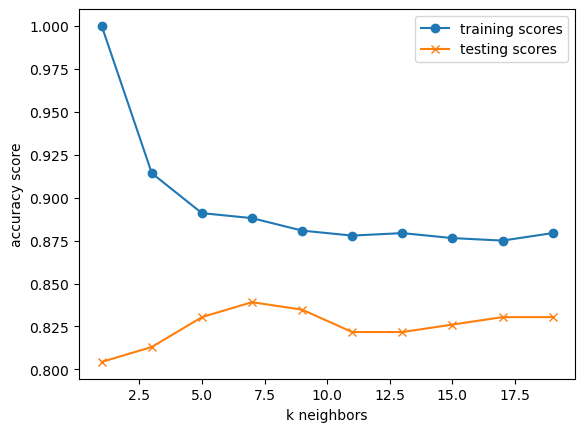

In [63]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f} | Gap: {train_score - test_score:.3f}")
    
# Plot the results
plt.plot(range(1, 20, 2), train_scores, marker='o', label="training scores")
plt.plot(range(1, 20, 2), test_scores, marker="x", label="testing scores")
plt.xlabel("k neighbors")
plt.ylabel("accuracy score")
plt.legend()
plt.show()